Saved: /content/text_line_1.jpg
Saved: /content/text_line_2.jpg
Saved: /content/text_line_3.jpg


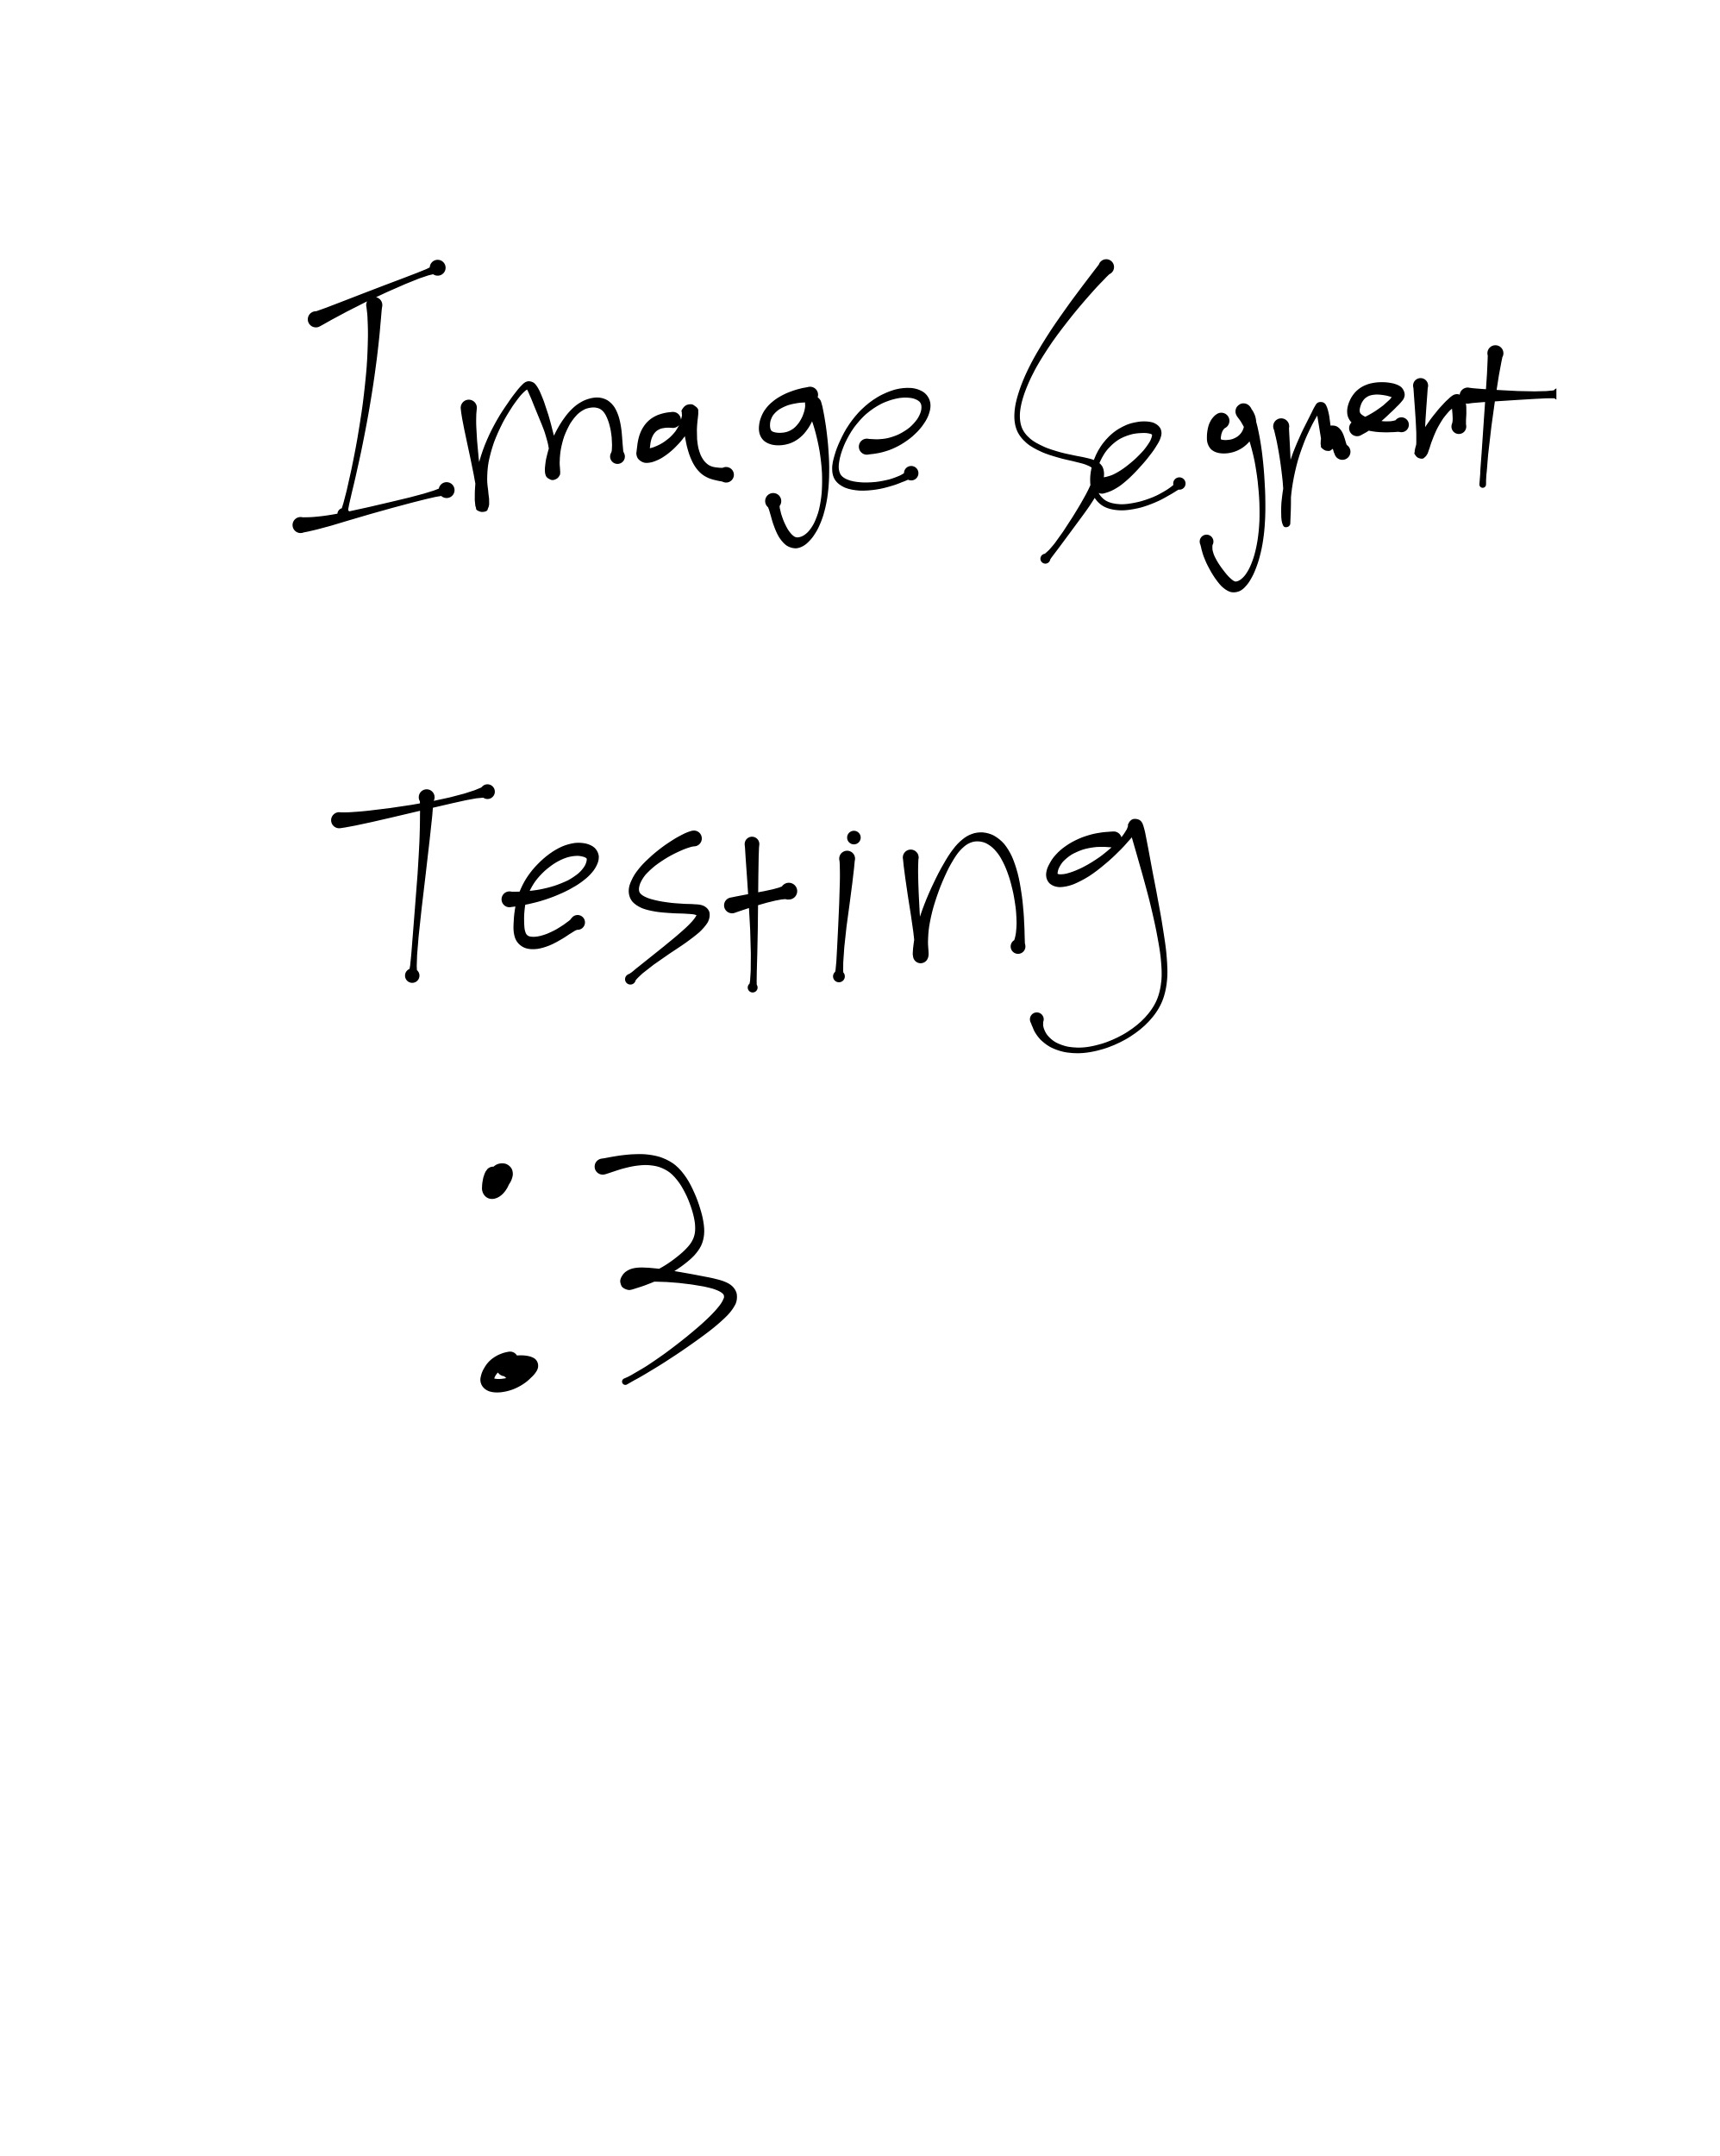

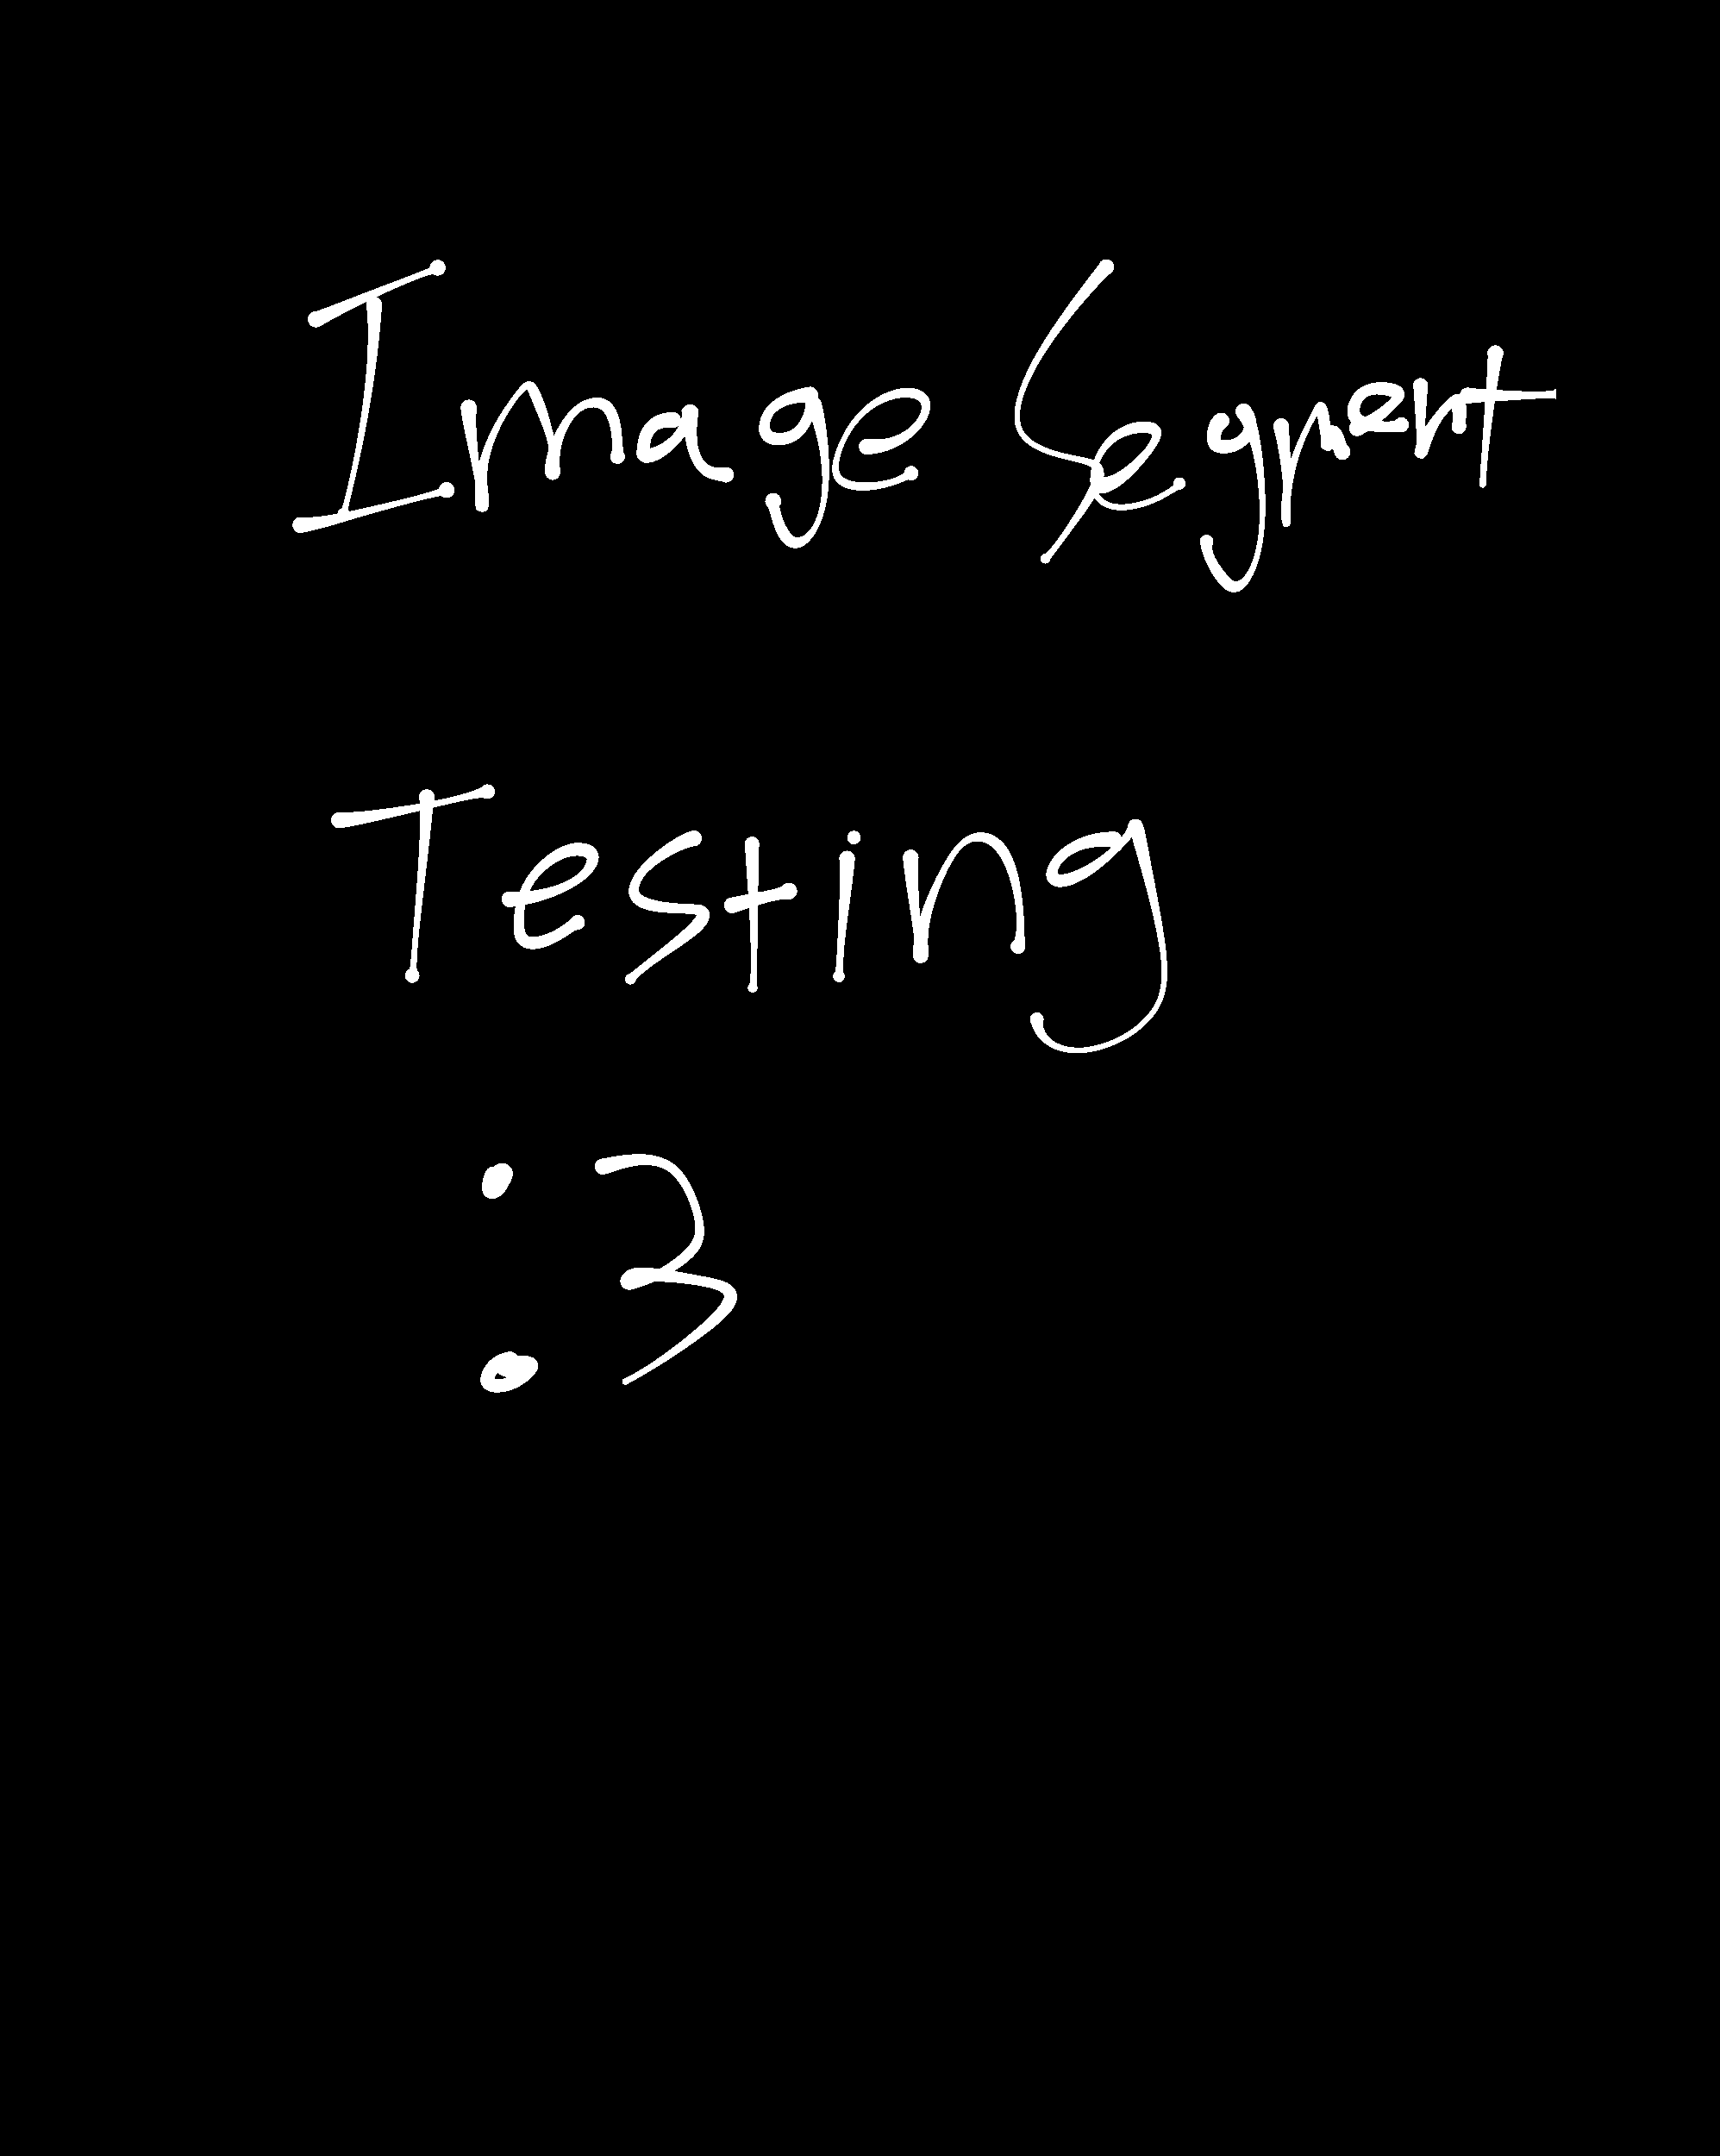

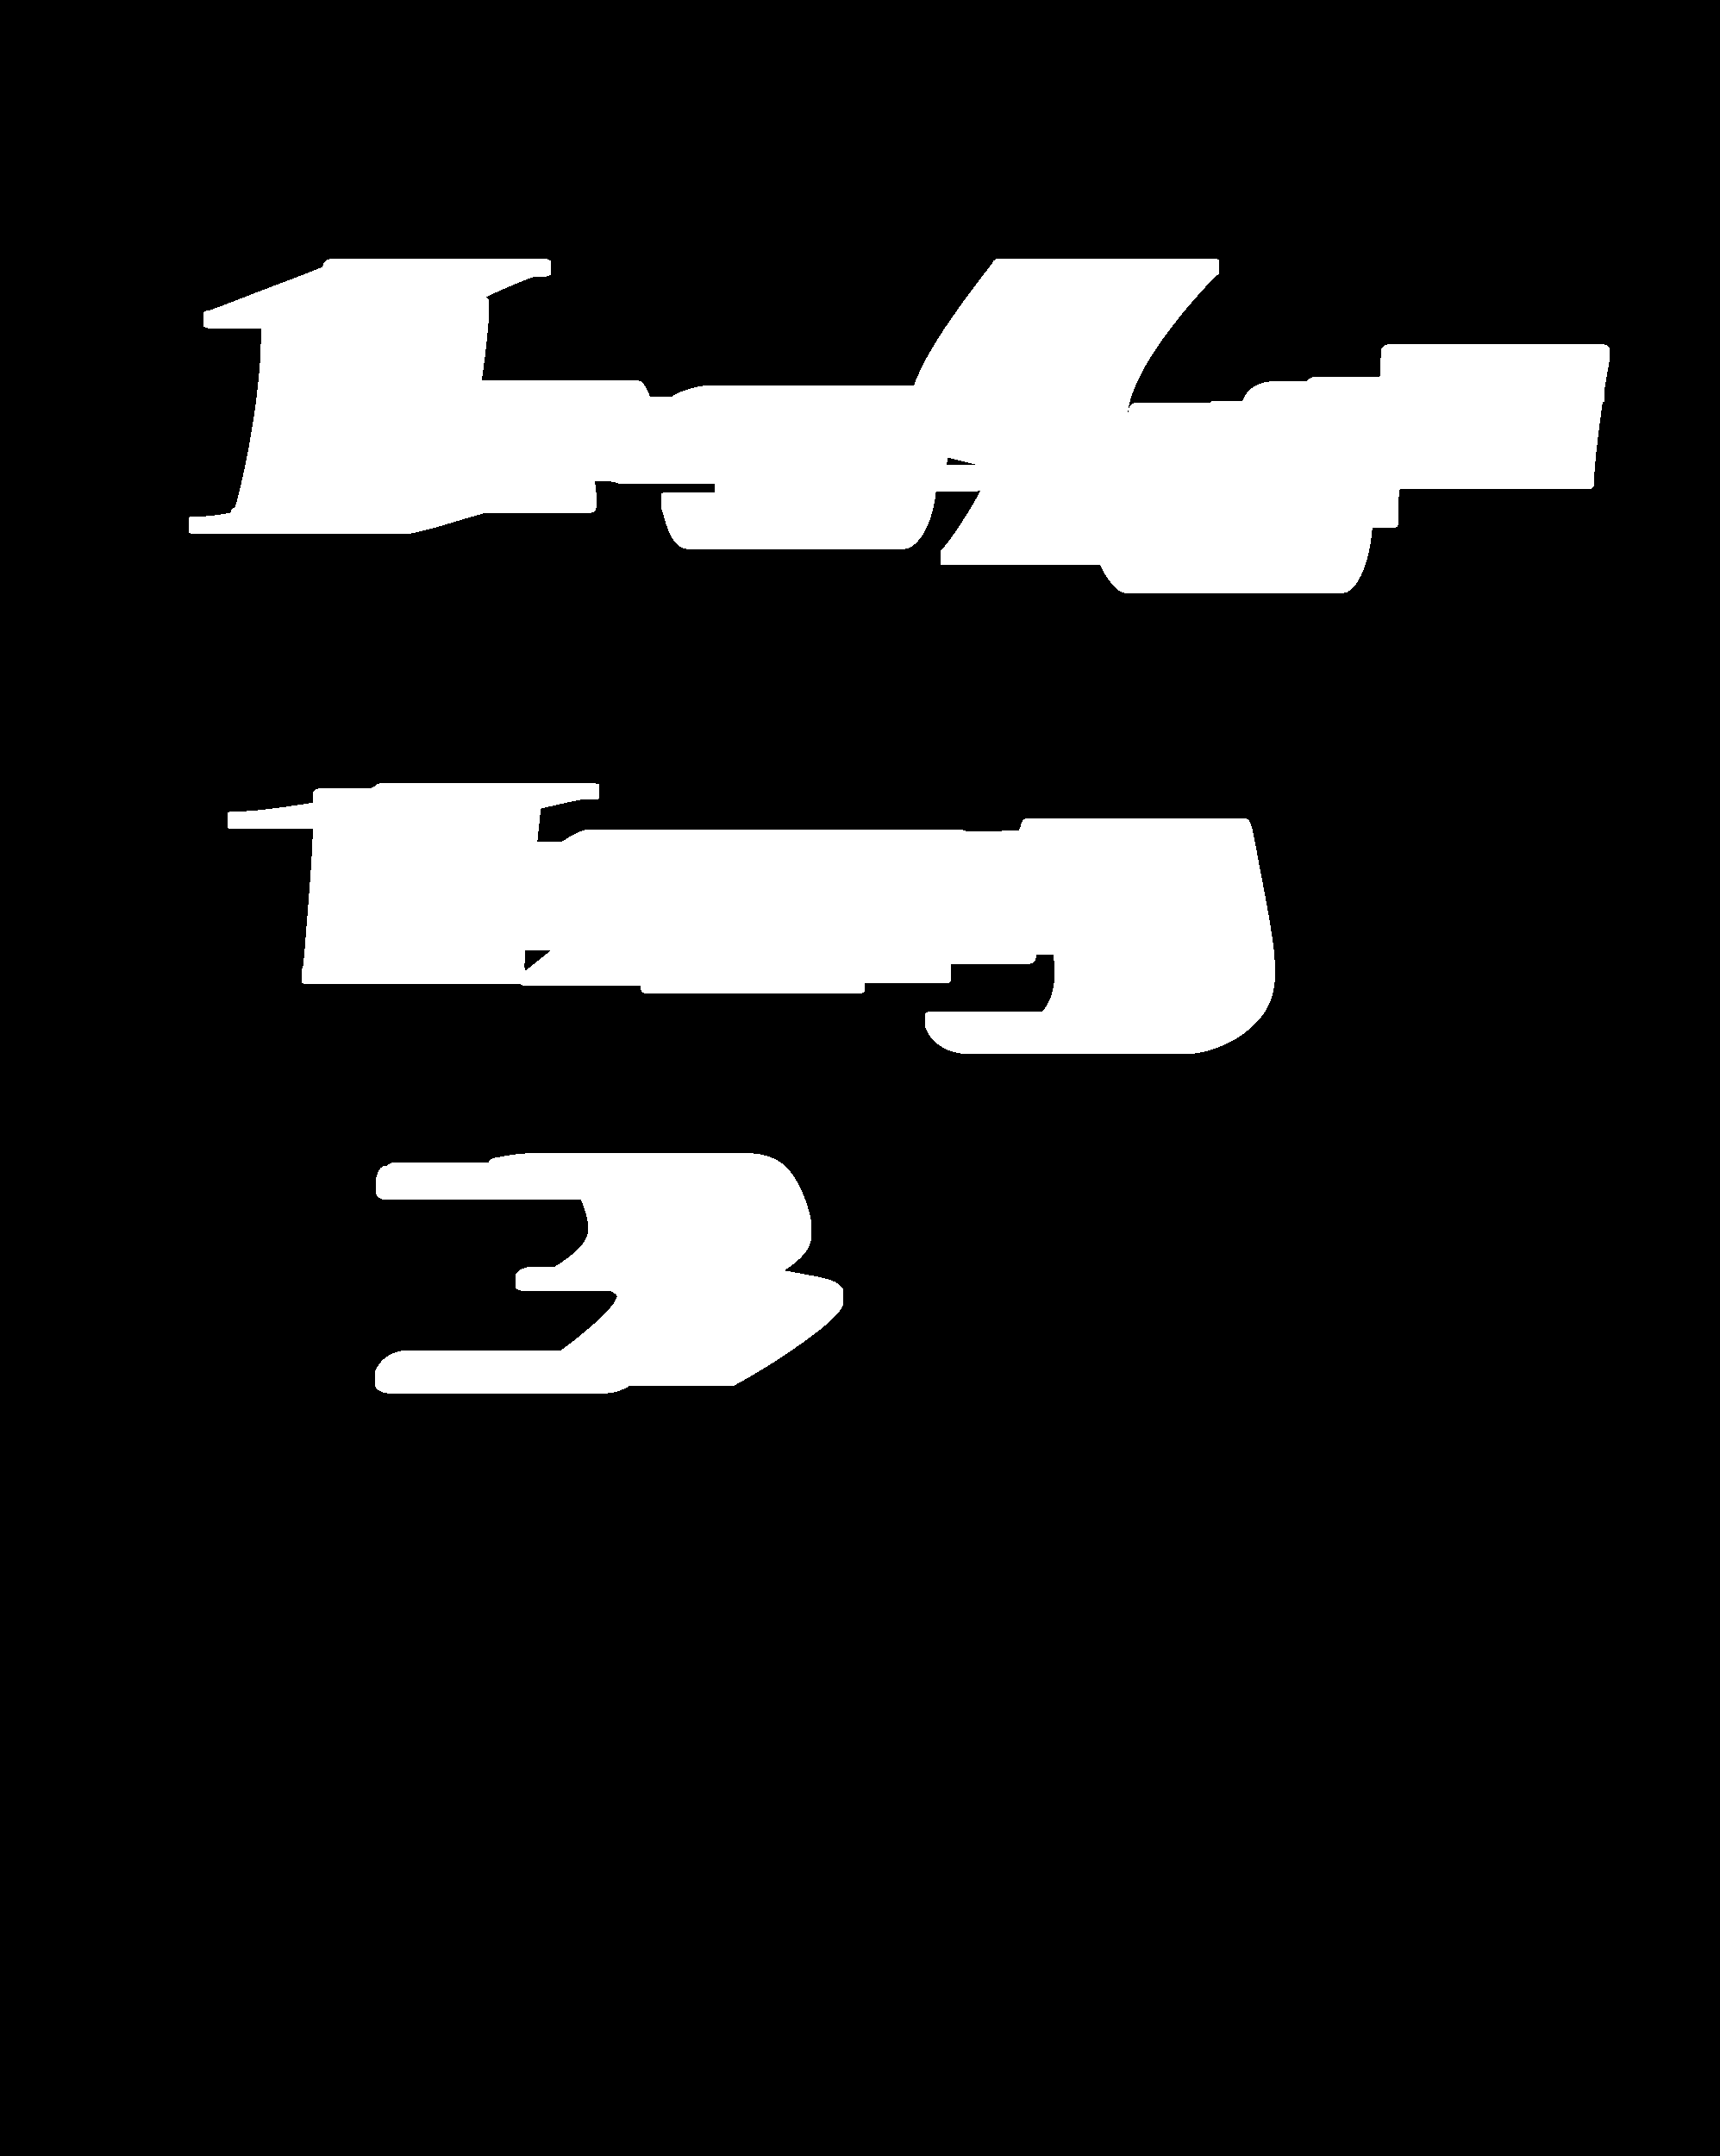

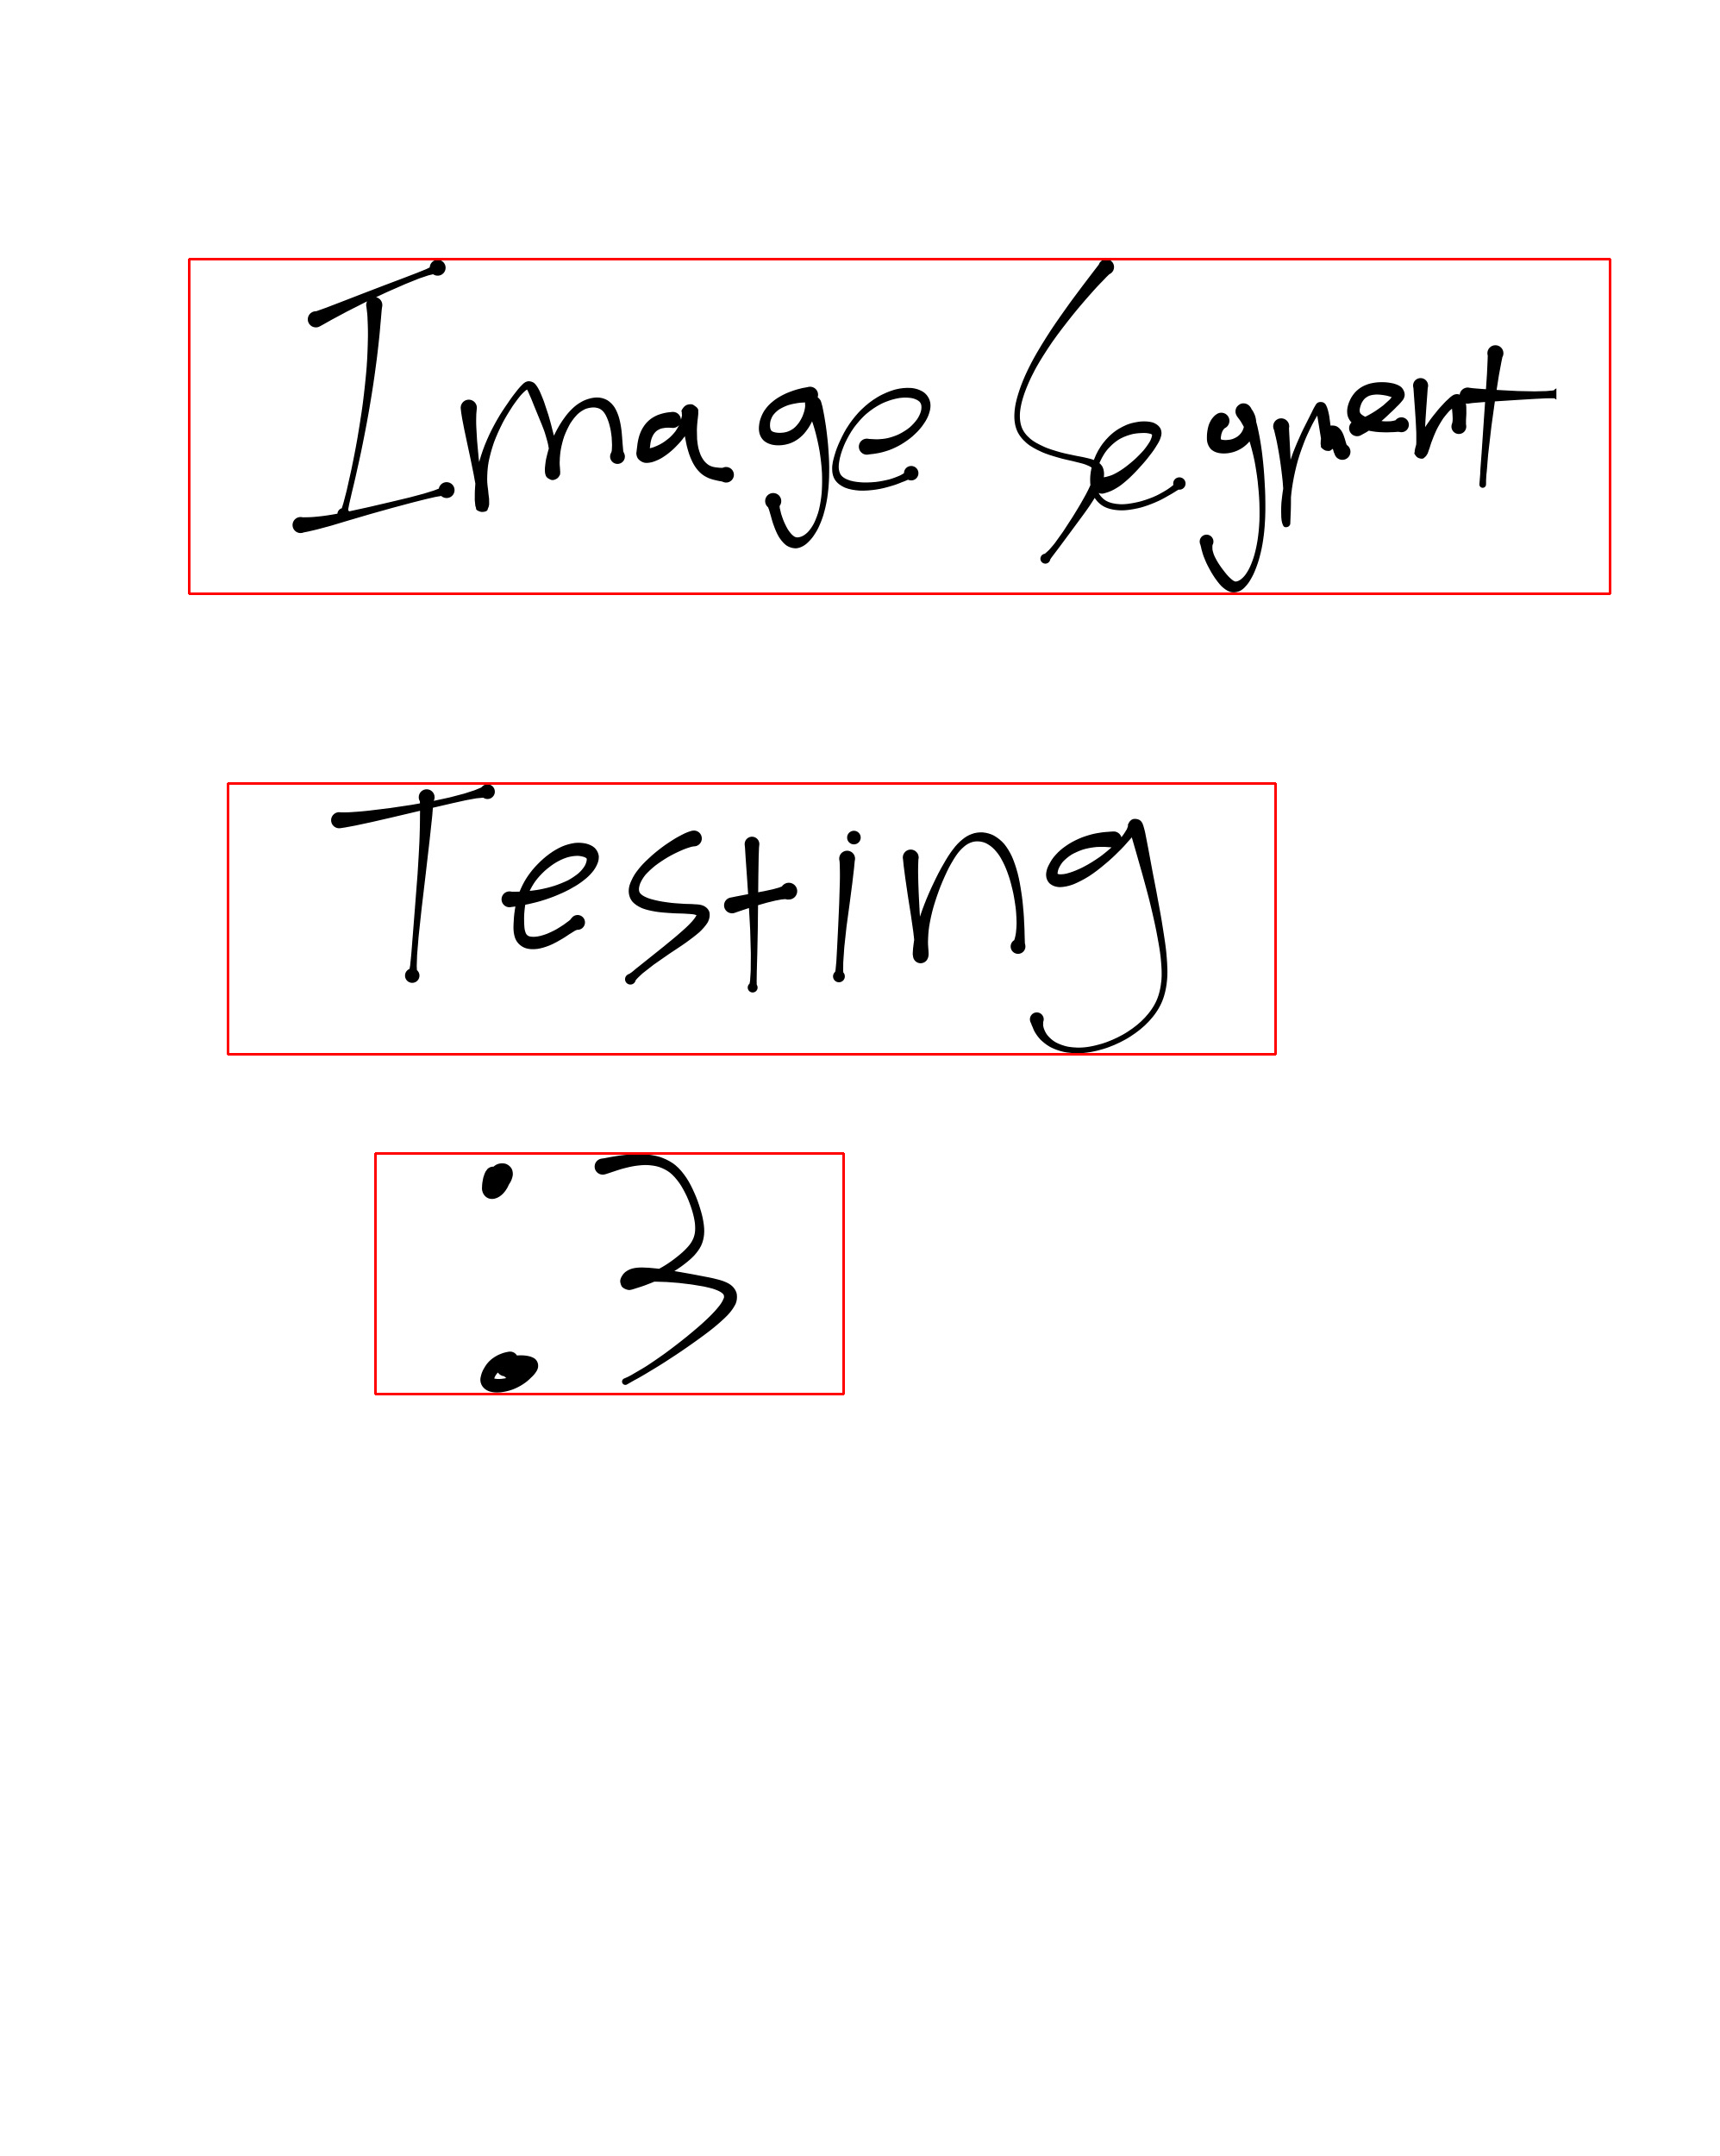

In [ ]:
'''
Original Code credit to:
https://stackoverflow.com/questions/61198983/segmenting-image-files-with-text-and-pictures-into-blocks
Answer by Username: fmw42
'''



import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# load image
img = cv2.imread("/content/imagesegmentationtesting.jpeg")

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the grayscale image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# use morphology erode to blur horizontally
#kernel = np.ones((500,3), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (250, 3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# find contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]


'''
# Draw contours
result = img.copy()
for c in cntrs:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
'''

# Create output directory
import os
output_dir = "/content"
os.makedirs(output_dir, exist_ok=True)

# Process each contour
result = img.copy()
for i, c in enumerate(cntrs):
    x, y, w, h = cv2.boundingRect(c)

    # Draw bounding box on the result image
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # Crop the detected region
    text_segment = img[y:y+h, x:x+w]

    # Save each cropped text line as a separate image
    filename = f"{output_dir}/text_line_{i+1}.jpg"
    cv2.imwrite(filename, text_segment)
    print(f"Saved: {filename}")


# write result to disk
cv2.imwrite("test_text_threshold.png", thresh)
cv2.imwrite("test_text_morph.png", morph)
cv2.imwrite("test_text_lines.jpg", result)

cv2_imshow(gray)
cv2_imshow(thresh)
cv2_imshow(morph)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()